## Data Collection 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [86]:
df = pd.read_csv("train_PDjVQMB.csv")
df1 = pd.read_csv("test_lTY72QC.csv")
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


## Data Cleaning

In [87]:
print(f"train_set: {df.shape}")
print(f"test_set: {df1.shape}")

train_set: (6650, 11)
test_set: (2851, 10)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [88]:
print(df.isnull().sum())
print("-----------------------------")
print(df1.isnull().sum())

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64
-----------------------------
ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64


we are not having any null values in our dataset

In [89]:
df.nunique()

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

It looks we are having only 2 features with continouus columns
* __ID won't be able to provide us any information. So lets drop it__

In [90]:
df.drop("ID", axis = 1,inplace=True)
df.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [91]:
# Check variable data types
df.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

Product Holding and credit category are having object datatype so we to fix them

# Exploratory Data Analysis

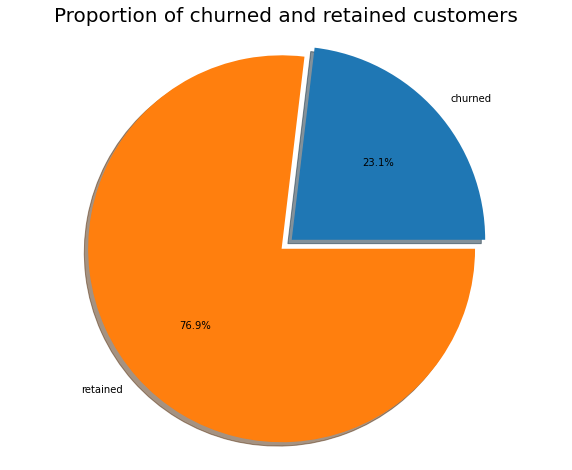

In [92]:
labels = 'churned', 'retained'
sizes = [df[df['Is_Churn']==1]["Is_Churn"].count(),df[df['Is_Churn']==0]["Is_Churn"].count()]
explode = (0, 0.07)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=360)
ax1.axis('equal')
plt.title("Proportion of churned and retained customers", size = 20)
plt.show()

We have been given imbalanced dataset
* __It is clear 23% customers are churned__
* __Model built with the this dataset won't perform well when applied churned data__

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='Is_Churn'>

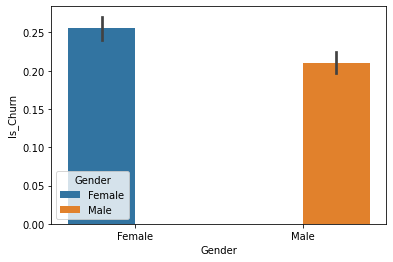

In [93]:
sns.barplot(df["Gender"],df["Is_Churn"],hue=df["Gender"])

* __Females are having higher churn rate than males__
* __Lets change the male and female into 1 and 0__


In [94]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x=="Male" else 0)
df1["Gender"] = df1["Gender"].apply(lambda x: 1 if x=="Male" else 0)
df['Gender'].value_counts()

1    3612
0    3038
Name: Gender, dtype: int64

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Income', ylabel='Is_Churn'>

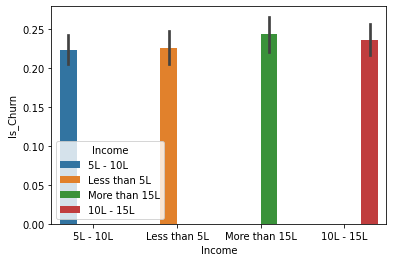

In [95]:
sns.barplot(df["Income"],df["Is_Churn"],hue=df["Income"])

* __People who are having more than 15L income are having haigher churn rate__
* __This can be worrysome, company has to check the reason behind this__

In [96]:
check_income= {"Less than 5L":1,
"5L - 10L":2,   
"10L - 15L":3,
"More than 15L":4
}
df["Income"] = df["Income"].apply(lambda x: check_income[x.strip()])
df["Income"].value_counts()

3    1885
2    1847
1    1573
4    1345
Name: Income, dtype: int64

In [97]:
df1["Income"] = df1["Income"].apply(lambda x: check_income[x.strip()])
df1["Income"].value_counts()

3    844
2    794
1    648
4    565
Name: Income, dtype: int64

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vintage', ylabel='Is_Churn'>

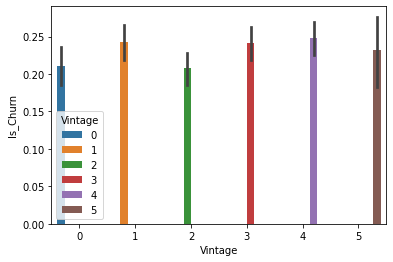

In [98]:
sns.barplot(df["Vintage"],df["Is_Churn"],hue=df["Vintage"])

* __Customers who are associated with the company from 1 and 4 years are having higher churn rate__

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Transaction_Status', ylabel='Is_Churn'>

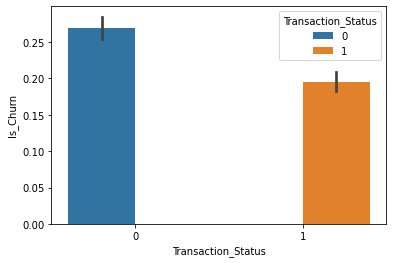

In [99]:
sns.barplot(df["Transaction_Status"],df["Is_Churn"],hue=df["Transaction_Status"])

* __The customers who are not making any transaction in 3 months are having higher churn rate__
* __We to ensure that customers keep makind transaction__

In [100]:
df["Transaction_Status"] = df["Transaction_Status"].apply(lambda x: -1 if x==0 else 1)
df1["Transaction_Status"] = df1["Transaction_Status"].apply(lambda x: -1 if x==0 else 1)

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Holdings', ylabel='Is_Churn'>

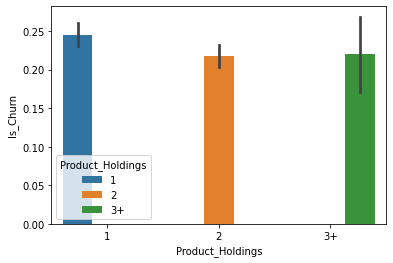

In [101]:
sns.barplot(df["Product_Holdings"],df["Is_Churn"],hue=df["Product_Holdings"])

* __Customers who are holding only one product of a comapany are having churn rate__

In [102]:
holdings = {
    "1":1,
    "2":2,
    "3+":3
}
df["Product_Holdings"] = df["Product_Holdings"].apply(lambda x: holdings[x])
df["Product_Holdings"].dtypes

dtype('int64')

In [103]:
df1["Product_Holdings"] = df1["Product_Holdings"].apply(lambda x: holdings[x])
df1["Product_Holdings"].value_counts()

2    1359
1    1342
3     150
Name: Product_Holdings, dtype: int64

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Card', ylabel='Is_Churn'>

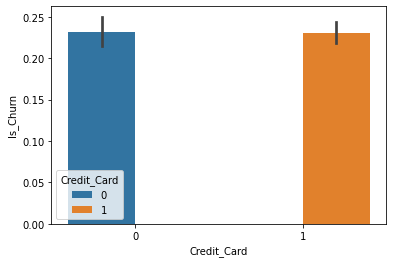

In [104]:
sns.barplot(df["Credit_Card"],df["Is_Churn"],hue=df["Credit_Card"])

* __Customers who aren't having cerdit have slight higher rate than the one who are having__

In [105]:
df["Credit_Card"] = df["Credit_Card"].apply(lambda x: -1 if x==0 else 1)
df1["Credit_Card"] = df1["Credit_Card"].apply(lambda x: -1 if x==0 else 1)

C:\Users\IlAaf Nisar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Category', ylabel='Is_Churn'>

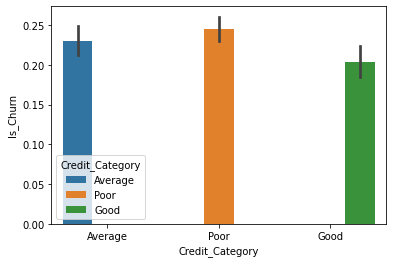

In [106]:
sns.barplot(df["Credit_Category"],df["Is_Churn"],hue=df["Credit_Category"])

* __Customers who are having poor credit score have high credit rate__
* __For better model, lets create dummy of this feature__

In [107]:
df[["Crdt_Cat_Good","Crdt_Cat_Poor"]] = pd.get_dummies(df["Credit_Category"],drop_first=True)
df1[["Crdt_Cat_Good","Crdt_Cat_Poor"]] = pd.get_dummies(df1["Credit_Category"],drop_first=True)
df.drop("Credit_Category",axis=1,inplace=True)
df1.drop("Credit_Category",axis=1,inplace=True)

<AxesSubplot:xlabel='Is_Churn', ylabel='Age'>

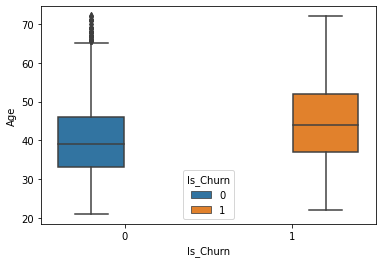

In [108]:
sns.boxplot(y='Age',x = 'Is_Churn', hue = 'Is_Churn',data = df)

* __Customers who are having poor credit score have high credit rate__
* __It is descrete feature with 52 unique values so lets use data binning to categorize customers based on their age__

In [109]:
# age_dict = {'young': '20-29', 'adult': '30-39', 'mid-age': '40-59', 'elder' :'60-80'}
def change_age(x):
    if(x in range(20,30)):
        return 1
    elif (x in range(30,40)):
        return 2
    elif (x in range(40,60)):
        return 3
    else:
        return 4
df["Age"] = df["Age"].apply(change_age)
df1["Age"] = df1["Age"].apply(change_age)
df["Age"].value_counts()


3    3091
2    2555
1     679
4     325
Name: Age, dtype: int64

<AxesSubplot:xlabel='Is_Churn', ylabel='Balance'>

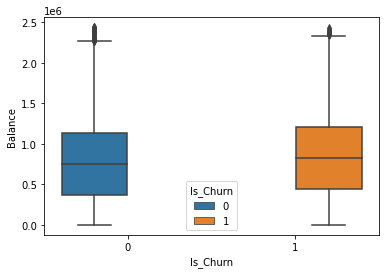

In [110]:
sns.boxplot(y='Balance',x = 'Is_Churn', hue = 'Is_Churn',data = df)

* __Customers with higher Balance are having high churn rate__
* __Since the Balance and Income have same impact on churn, so add a new feature__

In [111]:
df["Inc_Bal_Ratio"] = df["Balance"]/df["Income"]
df1["Inc_Bal_Ratio"] = df1["Balance"]/df1["Income"]
df["Inc_Bal_Ratio"].head()

0    281633.2200
1    875572.1100
2    175401.7650
3    348480.5400
4    223286.5575
Name: Inc_Bal_Ratio, dtype: float64

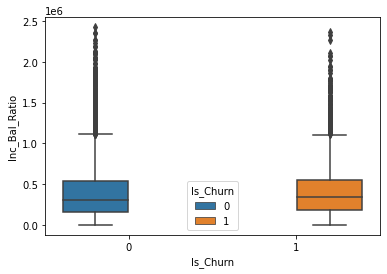

In [112]:
x = sns.boxplot(y='Inc_Bal_Ratio',x = 'Is_Churn', hue = 'Is_Churn',data = df)

* __Customer with high Inc_Bal_Ratio are having high churn rate__

In [113]:
y = df.pop("Is_Churn")
X = df
col = X.columns

* __Before building our model we have to fix out imbalanced dataset__

In [114]:
from imblearn.combine import SMOTETomek
from collections import Counter
counter = Counter(y)
print(f"Before Train: {counter}")
smtom = SMOTETomek(random_state=139)
X, y = smtom.fit_resample(X,y)
counter = Counter(y)
print(f"Before Train: {counter}")

Before Train: Counter({0: 5113, 1: 1537})
Before Train: Counter({0: 3729, 1: 3729})


In [115]:
X.describe()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Crdt_Cat_Good,Crdt_Cat_Poor,Inc_Bal_Ratio
count,7458.000000,7458.000000,7458.000000,7.458000e+03,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7.458000e+03
mean,2.433226,0.429069,2.476669,8.246208e+05,2.125905,-0.022794,1.453071,0.322875,0.172700,0.377715,4.208878e+05
std,0.696092,0.494976,1.056817,5.198160e+05,1.385512,0.909483,0.547107,0.861349,0.378013,0.484848,3.762634e+05
min,1.000000,0.000000,1.000000,6.300000e+01,0.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,2.100000e+01
25%,2.000000,0.000000,2.000000,4.237841e+05,1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,1.628274e+05
50%,2.000000,0.000000,3.000000,7.831854e+05,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.225561e+05
75%,3.000000,1.000000,3.000000,1.175974e+06,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,5.550513e+05
max,4.000000,1.000000,4.000000,2.436616e+06,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.421910e+06


* __Mean and standard deviation of Balance is much higher that the rest of the features__
* __Lets standard all features to build better model__

In [116]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [117]:
test = scale.fit_transform(df1.loc[:, df1.columns != 'ID'])
print(X.shape)
print(y.shape)

(7458, 11)
(7458,)


## Data Preparation

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.20,random_state=200)
print(f"train_set:{x_train.shape}{y_train.shape}")
print(f"Validation_set:{x_val.shape}{y_val.shape}")

train_set:(5966, 11)(5966,)
Validation_set:(1492, 11)(1492,)


In [120]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [121]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

## Model Evaluation

In [38]:
# Fit primal logistic regression
param_grid = {'C': [0.0001,0.001,0.01, 0.1], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001],'solver':["lbfgs","liblinear"]}
log_grid = GridSearchCV(LogisticRegression(),param_grid, cv=10, refit=True, verbose=0)
log_grid.fit(x_train,y_train)
print(f"Base_Model: {best_model(log_grid)}")

0.6939302215776871
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=250, tol=1e-05)
Base_Model: None


In [39]:
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
polDegree2 = poly2.fit_transform(x_train)
polDegree3 = poly3.fit_transform(x_train)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol3_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(polDegree2,y_train)
log_pol3_Grid.fit(polDegree3,y_train)
print(f"X^2: {best_model(log_pol2_Grid)}")
print(f"X^3: {best_model(log_pol3_Grid)}")

0.7767351706843802
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')
X^2: None
0.7690253446612779
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=0.1, max_iter=300, solver='liblinear', tol=1e-06)
X^3: None


* __It is clear from the above models that polynomial model with degree = 2 is performing best for our data__

In [40]:
# Fit random forest classifier
param_grid = {'max_depth': [8,9,11], 'max_features': [2,4,6,7,8,9],'n_estimators':[100,500],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(x_train,y_train)
best_model(RanFor_grid)

0.8042229869661242
{'max_depth': 11, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 500}
RandomForestClassifier(max_depth=11, max_features=8, min_samples_split=3,
                       n_estimators=500)


In [41]:
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
params = {
'n_neighbors':[5,6,7,8,9,10],
'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}
KNN_Grid = GridSearchCV(KNeighborsClassifier(),params, cv=10, refit=True, verbose=0)
KNN_Grid.fit(x_train,y_train)
best_model(KNN_Grid)

0.7331523388755861
{'algorithm': 'auto', 'n_neighbors': 8}
KNeighborsClassifier(n_neighbors=8)


In [44]:
# Fit Extreme Gradient boosting classifier
param_grid = {'objective':['reg:logistic'],'use_label_encoder':[False],'max_depth': [7,8,9], 
              'gamma': [0.1,0.01,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 
              'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(objective = 'reg:logistic',use_label_encoder=False), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(x_train,y_train)
best_model(xgb_grid)

0.8124368700164695
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:logistic', 'use_label_encoder': False}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


## Model Selection

In [46]:
poly2 = PolynomialFeatures(degree=2)
polDegree2 = poly2.fit_transform(x_train)
lGR_pol2 = LogisticRegression(C=50, max_iter=300, solver='liblinear',fit_intercept = True, intercept_scaling =  1, penalty = 'l2', tol = 0.0001)
lGR_pol2.fit(x_train,y_train)

LogisticRegression(C=50, max_iter=300, solver='liblinear')

In [47]:
RNF = RandomForestClassifier(max_depth=11, max_features=8, min_samples_split=3,n_estimators=500)
RNF.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, max_features=8, min_samples_split=3,
                       n_estimators=500)

In [48]:
KNN = KNeighborsClassifier(n_neighbors=8,algorithm = 'auto')
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [49]:
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:logistic', 'use_label_encoder': False}
XGB = XGBClassifier(gamma=0.01, learning_rate=0.2, max_depth=7, min_child_weight=1,n_estimators=100,objective='reg:logistic', use_label_encoder=False )
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

##  Final Model

In [80]:
from sklearn.ensemble import VotingClassifier
Vtg_Clf = VotingClassifier(estimators=[('lr', lGR_pol2), ('rf', RNF),('gnb', XGB)],voting = 'soft')
Vtg_Clf.fit(x_train,y_train)
y_Vtg_Clf = Vtg_Clf.predict(test)

In [81]:
print(classification_report(y_val, Vtg_Clf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       733
           1       0.88      0.76      0.81       759

    accuracy                           0.82      1492
   macro avg       0.83      0.82      0.82      1492
weighted avg       0.83      0.82      0.82      1492



In [122]:
sample = pd.read_csv("sample_OoSmYo5.csv")

In [123]:
sample["Is_Churn"] = y_Vtg_Clf
sample.to_csv("Combined_Model.csv",index=False)

# Model Visualization

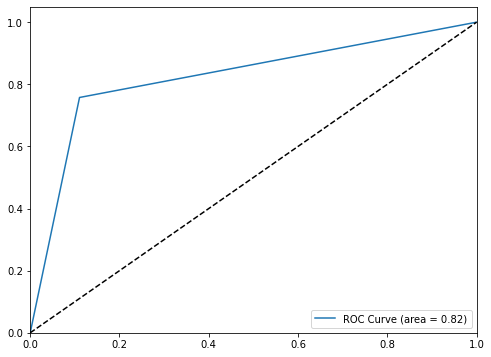

In [84]:
fpr,tpr,threshold = roc_curve(y_val, Vtg_Clf.predict(x_val) ,drop_intermediate=False)
auc_score = roc_auc_score(y_val,Vtg_Clf.predict(x_val))
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC Curve (area = %0.2f)' %auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")

AUC score = 80 represents this is a robust model